# Summary
These notes are for beginners in **python** and **graphs**.

We will look at:
- list (basic usage)
- a graph represented by an edge (incidence) list 
- a graph represented by an adjacency list
- traversing a graph
- graphs and matrices

# List (basic usage)
- symbol [], elements separated by comma
- ordered
- heterogenuous ('anything' can be an element)

First things to know:
- access operator [] argument is either an **index** or a range in the form **first:last:step**, the first element is **0** and the last **-1**
- many functions like (*pop* *append* ...). Notice the **dot** in its usage.

In [1]:
l = [12, 'abra', [2, 3.1], 11]
print(l[0], l[-1], l[-2][1], l[1:-1])

12 11 3.1 ['abra', [2, 3.1]]


In [2]:
print(l.pop(), l)

11 [12, 'abra', [2, 3.1]]


In [3]:
print(l.pop(0), l)

12 ['abra', [2, 3.1]]


I agree, the output is confusing: we see the values of the variables but not their names! Better ways of doing this are

In [4]:
last = l.pop(0)
print("last element of l is ", last, "l = ", l)
print(f"{last=} {l=}")

last element of l is  abra l =  [[2, 3.1]]
last='abra' l=[[2, 3.1]]


The last print statement is the most efficient. It uses *f-strings*, notice the usage of the =-sign; the curly braces are used for variable substitution.

# Graph as edge list
We consider a directed graph $G=(V,E)$ with $n={\rm card} V$ edges and $m={\rm card}E$ edges. The vertices of $V$ are identfied by means of a numbering $[1,\cdots,n]\to V$. The graph is now fully described by a list of all edges, an edge being represented as a two-element list of indices. For example:

In [5]:
edge_list = [[0,1], [2,1], [3,2], [4,3], [0,4], [1,4], [2,0], [4,2]]

In order to visualize our graph, we use *networkx*, python library for graphs (it is a powerful library, but at this point, we just use it for visualization). We use **import** to tell the python interpreter to load the library (if this doesn' work, we can install it via **pip**). Notice again the usage of the **dot** to access functions or elements of the library. (This can be nested..)

DiGraph with 5 nodes and 8 edges


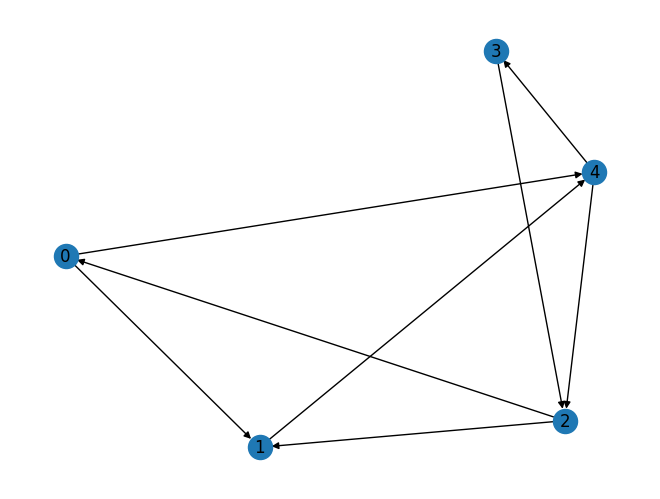

In [6]:
#!pip install networkx
import networkx as nx
G = nx.DiGraph(edge_list)
print(G)
nx.draw(G, with_labels = True)

You can see the arrows in the picture showing the direction of the edges, we have use **DiGraph** of *networx*, which is a directed or **oriented** graph. We can easily construct the associeted **non-oriented graph**, forgetting the orientation: to be more precise, we consider each edge as bidirectional. We just use the object **Graph** in *networx*.

Graph with 5 nodes and 8 edges


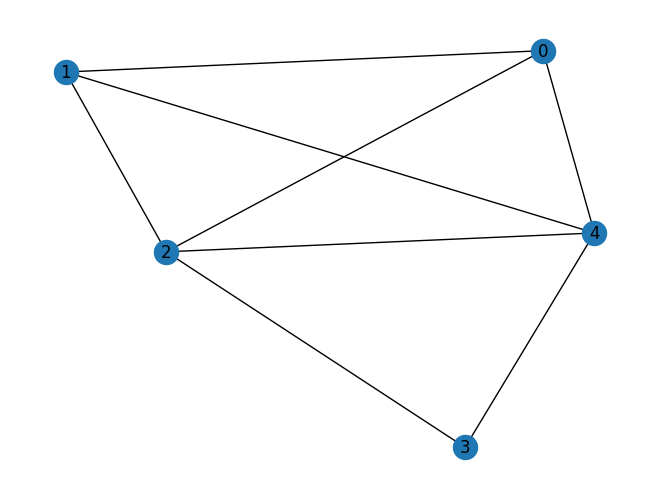

In [7]:
G2 = nx.Graph(G)
print(G2)
nx.draw(G2, with_labels = True)

# Graph as adjancy list
Alternatively, we can give the list of all neighbors of the vertex (**adjacancy list**). Let us construct the neighbor_list from the edge_list.

We start by creating an empty list containing $n$ empty lists, using *list comprehension*. Then we use a typical python loop over a list (the edges). Have a close look at the syntax of the loop (all other python constructions are similar): we use the double-point at the end of the for statement and the following **indented lines** are the corps, the code to be executed. Be careful with indentation in python!

In [8]:
neighbor_list = [[] for i in range(5)]
for e in edge_list:
    neighbor_list[e[0]].append(e[1])
print(neighbor_list)

[[1, 4], [4], [1, 0], [2], [3, 2]]


In [9]:
H = nx.DiGraph()
H.add_nodes_from([0, 1, 2, 3, 4])
for i,neis in enumerate(neighbor_list):
    for nei in neis:
        H.add_edge(i, nei)
print(H)

DiGraph with 5 nodes and 8 edges


Here we have used the enumerate() function, which allows us to get the index i while running through the list *neighbor_list*.

True
True
False
True


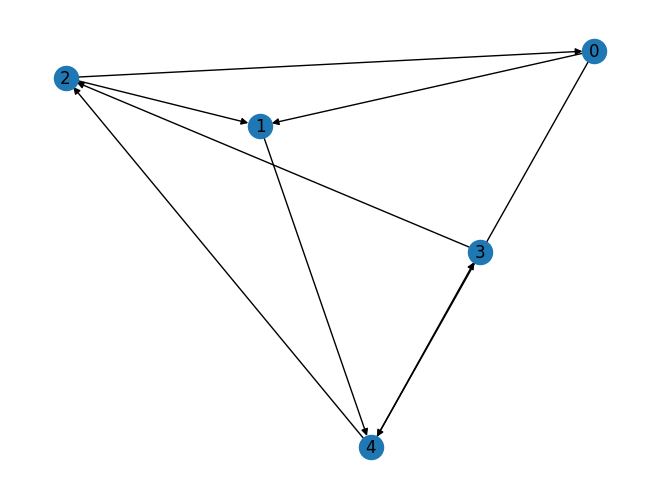

In [11]:
print(H.nodes()==G.nodes())
print(H.edges()==G.edges())
print(H==G)
print(nx.utils.graphs_equal(G,H))
nx.draw(H, with_labels = True)

In reality we have been quite sloppy about the meaning of representing a graph. Some observations:
- Let us say we are given a list of pairs of positive integers. This defines a graph with
  - **isolated vertices** (the indices which don't appear in the list)
  - **self-loops** if an edges is of the form [i,i] (identical start and end point)
- If an edge appears twice in the list, there are two different edges between the two vertices. We have a **multi-graph** (as in Euler's Königsberg bridge graph). This may be wanted or not, but cerainly our transformation from incidence list to adjancy list will ignore this. Working with adjancy, one often excludes multigraphs.

At this point it might be good to introduce **functions** in *python* (or better say how to build them, since we have already used many functions). The keyword is **def**, the arguments are given in paranthesis (which we have already seen for the function pop()). Finally the ouput is defined by **return**.

In [11]:
def neighborlist_to_digraph(nlist):
    H = nx.DiGraph()
    n = len(nlist)
    H.add_nodes_from(range(n))
    for i,neis in enumerate(nlist):
        for nei in neis:
            H.add_edge(i, nei)
    return H

We have used the (global) python functions **len()** (gives the length of an object, here the number of elements in a list) and **range()** (creates a sequence, similar to a list, 0,1,2,... of given length). Let us try our function

In [12]:
H2 = neighborlist_to_digraph(neighbor_list)
print(H2)
print(nx.utils.graphs_equal(H2,H))

DiGraph with 5 nodes and 8 edges
True


# Graph traversal
We want to walk along the edges in order to get a list of all vertices, starting with an arbitrary vertex, and avoiding to visit a vertex again. Clearly, we have to track of the visited ones. But we have to decide of the order to choose the next vertex: should we first visit all neighbors or should we first go as far as we can from one neighbor? The difference is
-- breadth-first-search
-- depth-first-search
We will see that there is only a minimal difference in coding...

Lets start with breadth-search. We will use a list to construct our path and a list for next vertices to visit (since we can only visit one by one). We call this list queue (since this is the name in computer science) and fill it with the first vertex. So

In [13]:
path = []
queue = [0]
while queue:
    u = queue.pop(0)
    path.append(u)
    for v in neighbor_list[u]:
        if v not in path and v not in queue:
            queue.append(v)
print(f"{path=}")

path=[0, 1, 4, 3, 2]


Our prefernce to first visit all neigbors of a given vertex (before going to the childs) is expressed in the argument of the pop function!  
What if instead we use the newest one?

In [12]:
path = []
stack = [0]
while stack:
    u = stack.pop()
    path.append(u)
    for v in neighbor_list[u]:
        if v not in path and v not in stack:
            stack.append(v)
print(f"{path=}")

path=[0, 4, 2, 3, 1]


We start from 0 to 4, but this time the next vertex comes from a newer generation, 2 is a child of 4. But then the child of 2 is 0, which we have already seen... so we take the other child of 4, which is 3...  
It is interesting to print out the values of the stack/queue variables in each step..

Of coarse, you can turn the above code into functions.  
There are also many useful things that can be done by graph traversal. For example, you might be interested in finding the shortest path bewteen two vertices. Clearly, our traversal goes along the edges. If there is no path between two given vertices, they belong to different connex components and will not be in the same 'path' returned by the algorithm.

# Graphs as matrices
We will distinguish the two cases or oriented and nonoriented graphs.

But first we consider the problem of finding the number of vertices in an edge list. And use this to introduce **numpy**.

Given a list of edges, it is easy to find $m$, the number edges, but in order to find $n$, the number of vertices, we need to find the maximal entry in all two-element-lists of the edge list. This can be easily done with **numpy**:
- First we convert our list into an **nd-array**, the basic object in numpy to respresent vectors, matrices, and even higher order tensors. We get its dimensions with **shape**, which is a data element of an nd-array, so *not* a function, hence no parenthesis.
- Then we use the max() function, which can be either called globally or from a given object


In [14]:
import numpy as np
m = len(edge_list)
el = np.array(edge_list)
print(el)
print(f"{el.shape=}")
n = el.max() # same as n = np.max(el)
n += 1 # we start at zero!!
print(f"{n=}")

[[0 1]
 [2 1]
 [3 2]
 [4 3]
 [0 4]
 [1 4]
 [2 0]
 [4 2]]
el.shape=(8, 2)
n=np.int64(5)


## Non-oriented graph

For an undirected simple graph with $n$ vertices and $m$ edges, we define the **indicence matrix** of the graph, $B\in\{0,1\}^{n\times m}$, where

$$
B_{ij} =
\begin{cases}
1 &\quad \text{vertex $i$ is an endpoint of edge $j$},\\
0 &\quad \text{else}.
\end{cases}
$$
Notice that in each column of $B$ there are only two non-zero entries.

The third data element of an nd-array, beside its *data* and *shape* is **dtype**. 
Since *numpy* is made for scientific computing, there are different float and int types, as well as complex and booleans. 
Usually, one would not care, but here, we really want an integer matrix.

We need to know some additional things about *nd-array*:
- the *dimension*, is the number of indices: one for a vector, two for a matrix (not to be confound with the dimension of a vector space)
- the access operator is **[]** (again!) with comma seperated indices for the dimensions: A[0,1] is first row, second column of matrix A

In [15]:
B = np.zeros(shape=(n,m), dtype=int)
print(B.shape)
for j,e in enumerate(edge_list):
    B[e[0], j] = 1
    B[e[1], j] = 1
print(B)

(5, 8)
[[1 0 0 0 1 0 1 0]
 [1 1 0 0 0 1 0 0]
 [0 1 1 0 0 0 1 1]
 [0 0 1 1 0 0 0 0]
 [0 0 0 1 1 1 0 1]]


In *numpy* we get the tranposed matrix by function *transpose* or simply as '.T'. Be careful, there are different multiplications of nd-arrays : '*' is the element-wise multiplication, the usual multiplication of matrices (representing composition of linear applications) is '@'.
Let us compute $BB^T$.

In [16]:
print(B@B.T)

[[3 1 1 0 1]
 [1 3 1 0 1]
 [1 1 4 1 1]
 [0 0 1 2 1]
 [1 1 1 1 4]]


This is certainly a symmetric matrix relating vertices to vertices with elements
$$  (BB^T)_{ij} = \sum_{k=1}^m B_{ik}B_{jk}.$$
To distinguish between diagonals and off-diagonals let us write
$$ BB^T = D + A. $$
The structure is explained by:
- Off-diagonals (A):
    - $B_{ik}B_{jk}=1$ if and only edeg $k$ is incident to both vertices $i$ and $j$.
    - Therefore, for $i\ne j$ we can only have $A_{ij}=1$ in case there is an edge from $i$ to $j$ our 0 if not.
- Diagonals (D)
    - since the values og $B$ are in $\{0,1\}$, we have that $$D_i=\sum_{k=1}^m B_{ik}B_{ik}=\sum_{k=1}^m B_{ik}.$$ This important quantity, the number of edges incident to vertex $i$, is the **degree** of the vertex.

The matrix $A$ is the **adjacency matrix**.

**Oriented graph**

In this case, we define the incidence matrix $B\in\{0,1\}^{n\times m}$ as
$$
B_{ij} =
\begin{cases}
+1 &\quad \text{edge $j$ leaves vertex $i$},\\
-1 &\quad \text{edge $j$ enters vertex $i$},\\
0 &\quad \text{else}.
\end{cases}
$$
similar reasoning as before leads to the following observations concerning $BB^T$:
- if vertices $i$ and $j\ne i$ are connected, we have $-1$ and otherwise $0$
- the diagonal is the **(total) degree** of the vertex.
For our example we have:

In [18]:
B = np.zeros(shape=(n,m), dtype=int)
print(B.shape)
for j,e in enumerate(edge_list):
    B[e[0], j] = 1
    B[e[1], j] = -1
print(B)
print(B@B.T)

(5, 8)
[[ 1  0  0  0  1  0 -1  0]
 [-1 -1  0  0  0  1  0  0]
 [ 0  1 -1  0  0  0  1 -1]
 [ 0  0  1 -1  0  0  0  0]
 [ 0  0  0  1 -1 -1  0  1]]
[[ 3 -1 -1  0 -1]
 [-1  3 -1  0 -1]
 [-1 -1  4 -1 -1]
 [ 0  0 -1  2 -1]
 [-1 -1 -1 -1  4]]


This is the **graph laplacian** matrix. Its rows sum (as well as its column sum) is zero for any row. So zero is an eigenvalue. 
This matrix has many interesting properties, for example the dimension of the zero eigenspace is the number of connex components of the graph (and there is much more about it).

This time, the relation with the adjacency matrix is:
$$
L := BB^T = D - A.
$$